In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [3]:
df = pd.read_csv("train.csv", parse_dates=['date'])
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161851 entries, 0 to 161850
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           161851 non-null  int64         
 1   date         161851 non-null  datetime64[ns]
 2   store_nbr    161851 non-null  int64         
 3   family       161851 non-null  object        
 4   sales        161850 non-null  float64       
 5   onpromotion  161850 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 7.4+ MB


In [5]:
df.describe()

,id,date,store_nbr,sales,onpromotion
count,161851.000000,161851,161851.000000,161850.000000,161850.0
mean,80925.000000,2013-02-14 21:55:29.128643072,27.493281,196.262464,0.0
min,0.000000,2013-01-01 00:00:00,1.000000,0.000000,0.0
25%,40462.500000,2013-01-23 00:00:00,14.000000,0.000000,0.0
50%,80925.000000,2013-02-15 00:00:00,27.000000,0.000000,0.0
75%,121387.500000,2013-03-10 00:00:00,41.000000,87.617250,0.0
max,161850.000000,2013-04-01 00:00:00,54.000000,26067.000000,0.0
std,46722.503547,NaN,15.569197,666.997216,0.0


In [6]:
df.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,1
onpromotion,1


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(161851, 6)

In [9]:
print('Fecha minima:', df['date'].min())
print('Fecha maxima:', df['date'].max())

Fecha minima: 2013-01-01 00:00:00
Fecha maxima: 2013-04-01 00:00:00


In [10]:
df_eleccion = df[(df['store_nbr']== 1) & (df['family'] == 'BEVERAGES')].copy()

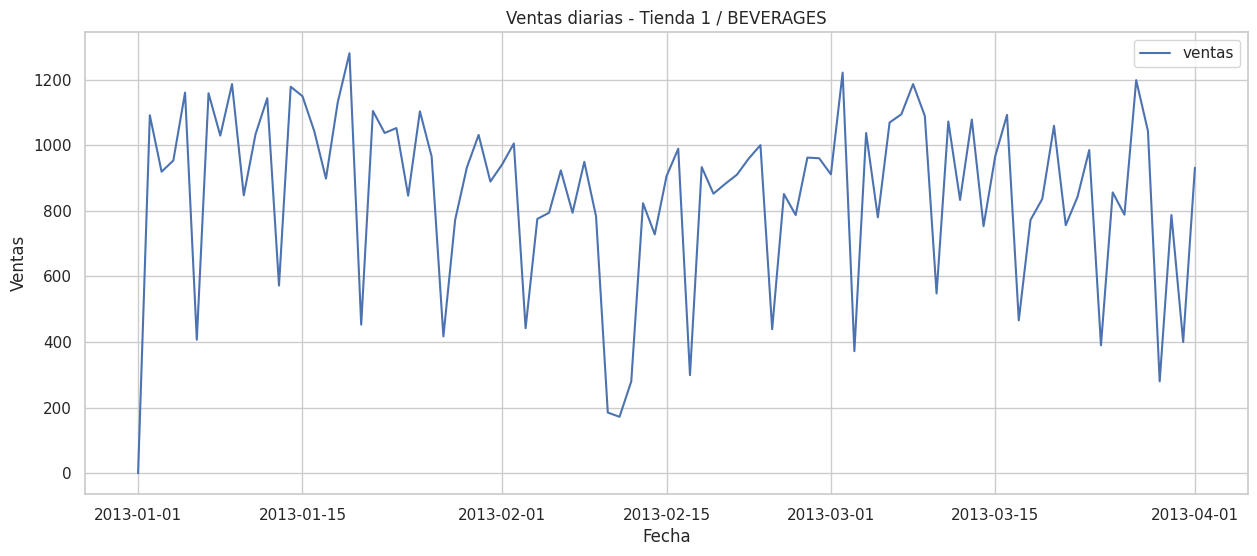

In [11]:
plt.figure(figsize=(15,6))
plt.plot(df_eleccion['date'], df_eleccion['sales'], label='ventas')
plt.title('Ventas diarias - Tienda 1 / BEVERAGES')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

In [12]:
df_eleccion['date'] = pd.to_datetime(df_eleccion['date'], errors='coerce')


In [13]:
df_eleccion['year'] = df_eleccion['date'].dt.year
df_eleccion['month'] = df_eleccion['date'].dt.month
df_eleccion['day'] = df_eleccion['date'].dt.day
df_eleccion['weekday'] = df_eleccion['date'].dt.weekday

Text(0.5, 1.0, 'Ventas según si hubo promoción')

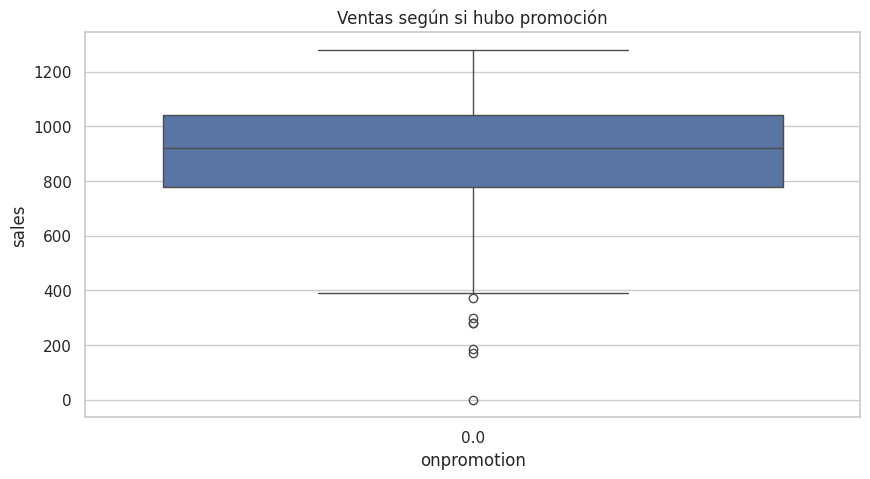

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='onpromotion', y='sales', data=df_eleccion)
plt.title('Ventas según si hubo promoción')

<Axes: >

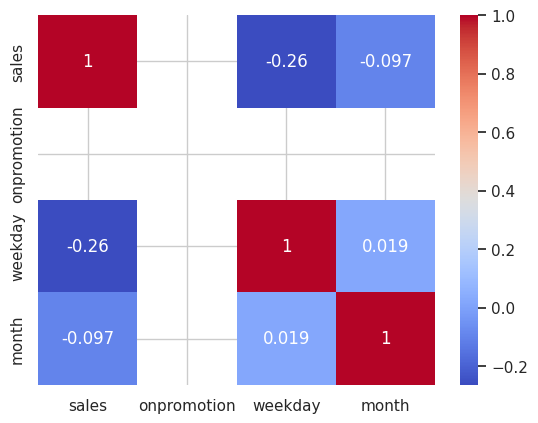

In [15]:
corr = df_eleccion[['sales', 'onpromotion', 'weekday', 'month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [16]:
import os
os.makedirs('data/processed', exist_ok=True)
df_eleccion.to_csv('data/processed/df_beverages_store1.csv', index=False)

In [18]:
df = pd.read_csv('data/processed/df_beverages_store1.csv', parse_dates=['date'])

In [23]:
features = ['onpromotion', 'month', 'day', 'weekday']
target = 'sales'

X = df[features]
y = df[target]



In [24]:
# 80% entrenamiento, 20% test
split = int(0.8 * len(df))

X_train = X.iloc[:split]
X_test = X.iloc[split:]

y_train = y.iloc[:split]
y_test = y.iloc[split:]

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Regresión Lineal
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Regresión Lineal - MAE:", mae_lr, " | RMSE:", rmse_lr)
print("Random Forest     - MAE:", mae_rf, " | RMSE:", rmse_rf)

Regresión Lineal - MAE: 190.229167493615  | RMSE: 235.63232946870002
Random Forest     - MAE: 182.6705263157894  | RMSE: 263.9734194752829


In [39]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [37]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

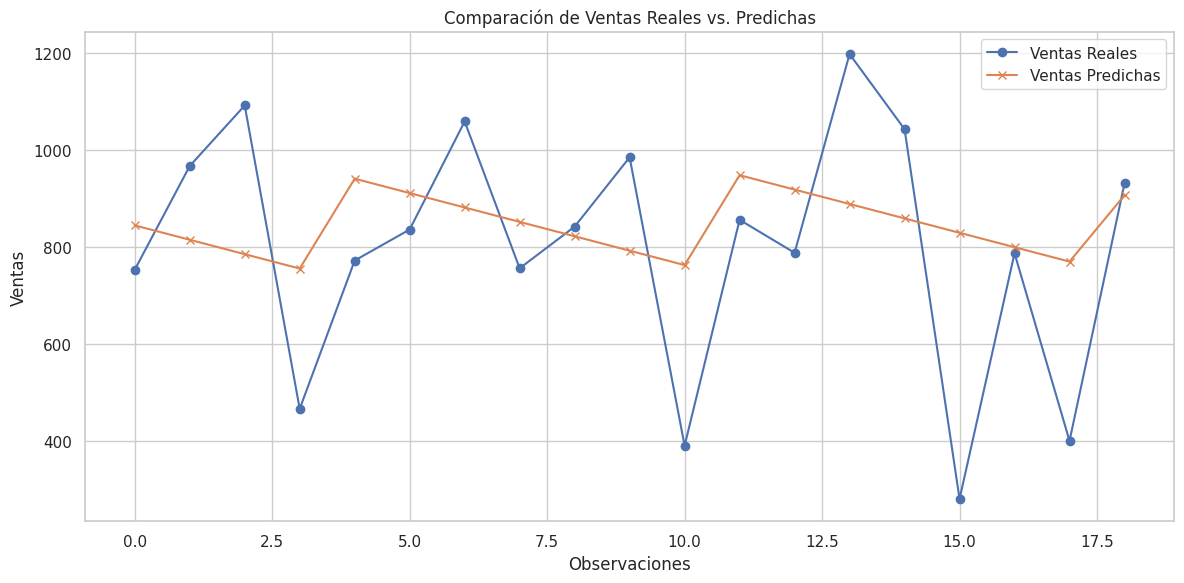

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Ventas Reales', marker='o')
plt.plot(y_pred_lr, label='Ventas Predichas', marker='x')
plt.title('Comparación de Ventas Reales vs. Predichas')
plt.xlabel('Observaciones')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

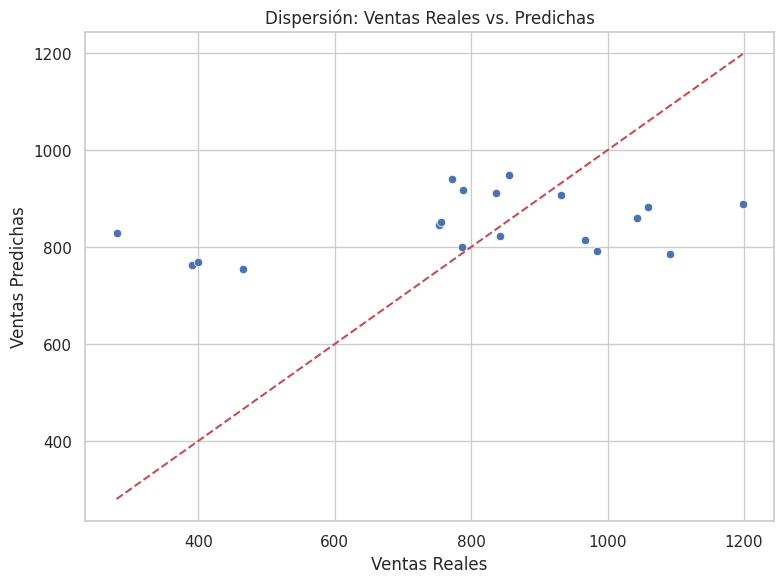

In [44]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea de referencia
plt.title('Dispersión: Ventas Reales vs. Predichas')
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.tight_layout()
plt.show()
